### 1. d) Pyhton code to estimate the phase of the unitary operator with t-bit precision

0.16666666666666666
Phase:  0.16666666666666666

Precison:  6



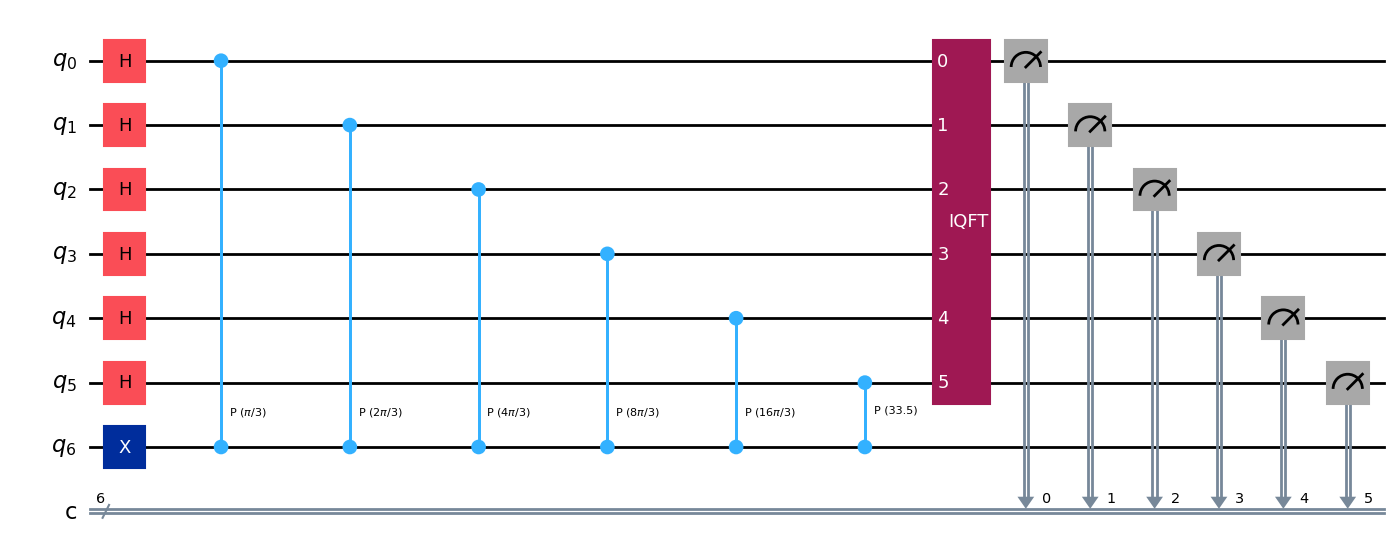

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.quantum_info import Statevector
pi = np.pi

phi = 1/6
print(phi)
print("Phase: ", phi)
print()

n = 6
print("Precison: ", n)
print()


qc = QuantumCircuit(n+1, n)

precision_bits = classical_bits = range(0, n) # 0 to n-1
qc.h(precision_bits)

qc.x(n)
for i in precision_bits:
    qc.cp((2 ** i)*(2*pi * phi), i, n)

iqft = QFT(n).inverse()

qc.append(iqft.to_gate(), precision_bits) # IQFT added to the the precison bits

qc.measure(precision_bits, classical_bits) # measuring the precision bits
qc.draw('mpl')

{'010011': 1, '001011': 692, '010001': 1, '001000': 18, '001001': 30, '001010': 182, '001111': 2, '001110': 6, '111011': 1, '101111': 1, '000110': 8, '111100': 1, '001101': 15, '010000': 4, '100000': 1, '000100': 3, '001100': 40, '011001': 1, '011010': 2, '000101': 2, '000111': 2, '000011': 1, '110111': 1, '000010': 2, '101011': 1, '110101': 1, '010111': 2, '010010': 1, '010101': 1, '011101': 1}


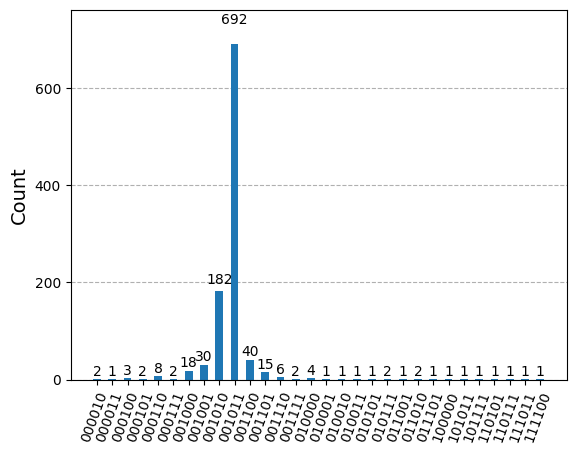

In [4]:
from qiskit_aer import Aer
from qiskit.visualization import  plot_histogram

sim = Aer.get_backend('aer_simulator')
trans = transpile(qc, sim)
results = sim.run(trans, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

### 2 b) Pyhton code 
**i. quantum circuit to prepare the quantum state |ψ−⟩**

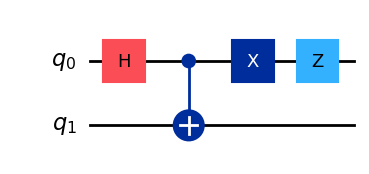

In [12]:
psi_minus = QuantumCircuit(2)

psi_minus.h(0)
psi_minus.cx(0,1)
psi_minus.x(0)
psi_minus.z(0)

psi_minus.draw('mpl')

In [13]:
state = Statevector(psi_minus)
state.draw('latex')

<IPython.core.display.Latex object>

**ii. to plot the histogram for the state |ψ−⟩**

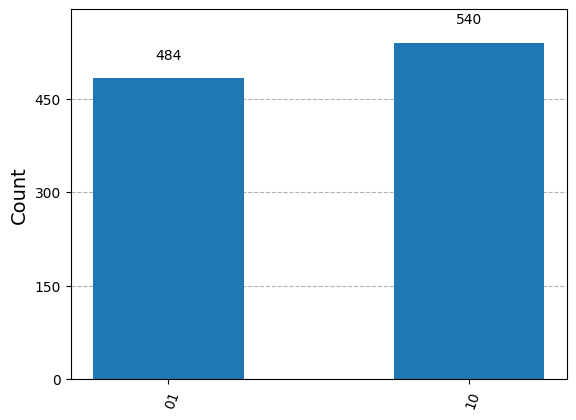

In [7]:
psi_minus.measure(range(2), range(2))
sim = Aer.get_backend('aer_simulator')
results = sim.run(psi_minus).result()
counts = results.get_counts()

plot_histogram(counts)

**(iii) to get Bloch sphere representation**

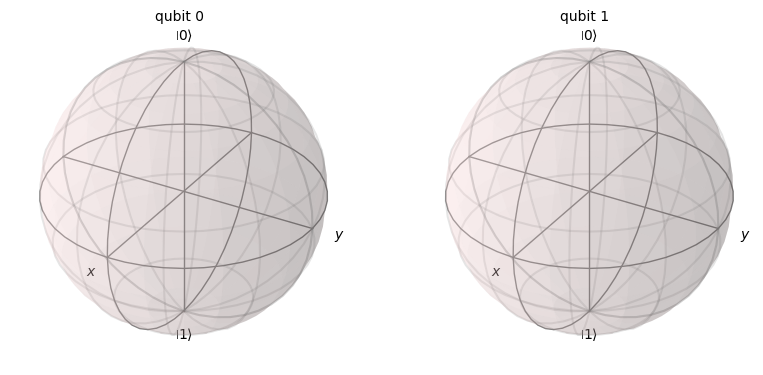

In [14]:
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
state = Statevector(psi_minus)

state.draw('bloch')

**(iv) to get the qsphere representation of the state**

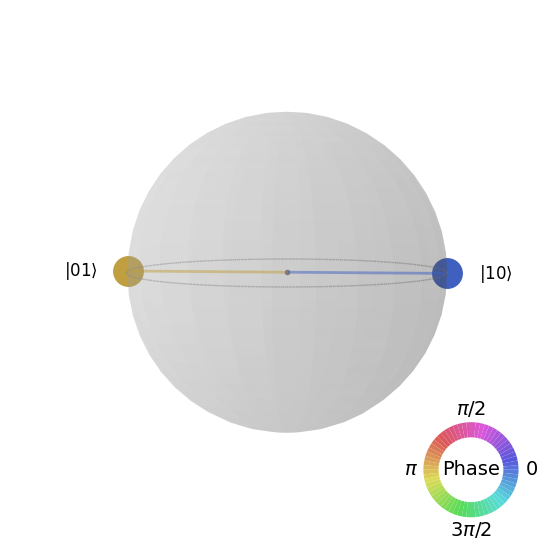

In [15]:
state.draw('qsphere')

**(v) to print the state vector and the density operator associated with |ψ−⟩, and provide
 the output.**
 

In [ ]:
from qiskit.visualization import array_to_latex

array_to_latex(state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [ ]:
dm = DensityMatrix(psi_minus)

# dm.draw('latex')
#or
array_to_latex(dm, prefix="\\text{Densitymatrix} = ")


<IPython.core.display.Latex object>

### 2 (c)Find the unitary operator associated with the entire circuit and write a Python code to obtain the unitary operator.

In [ ]:
unitary_operator = Operator(psi_minus)

# unitary_operator.draw('latex')
#OR
array_to_latex(unitary_operator, prefix="\\text{Operator} = ")



<IPython.core.display.Latex object>

**3 (c) Write a Python code to compute the entanglement of arbitrary pure two-qubit systems.**

In [ ]:
import numpy as np

def get_eigen_values(matrix):
    return np.linalg.eigvals(matrix)


def partial_trace(matrix, system):
    if system == 0:
        return np.array([
            [matrix[0, 0] + matrix[1, 1], matrix[0, 2] + matrix[1, 3]],
            [matrix[2, 0] + matrix[3, 1], matrix[2, 2] + matrix[3, 3]]
        ])

    if system == 1:
        return np.array([
            [matrix[0, 0] + matrix[2, 2], matrix[0, 1] + matrix[2, 3]],
            [matrix[1, 0] + matrix[3, 2], matrix[1, 1] + matrix[3, 3]]
        ])    
    else:
        raise ValueError("System index must be 0 or 1.")


def cal_von_neu_entropy(matrix):
    eigenvalues = get_eigen_values(matrix)
    f_eignevalues = np.round( np.real( eigenvalues ) ,10 )
    entropy = 0
    for eval in f_eignevalues:
        if eval != 0:
            entropy += eval*np.log2(1/eval)

    return entropy


def get_the_density_matrix(state):
    density_matrix = np.outer(state, state.conj())
    return density_matrix

def is_density_matrix(rho, tol=1e-8):
    rho = np.array(rho)
    #square matrix check
    if rho.shape[0] != rho.shape[1]:
        # print('1')
        return False
    # Hermitian check
    if not np.allclose(rho, rho.conj().T, ataol=tol):
        # print('2')
        
        return False
    # trace check
    if not np.isclose(np.trace(rho), 1, atol=tol):
        # print('3')
        
        return False
    # eigen val check
    evals = get_eigen_values(rho)
    if np.any(evals < -tol):
        # print('4')
        return False
    
    return True


state = np.array([0, 1, 1, 0]) / np.sqrt(2)
rho_AB = get_the_density_matrix(state)
if is_density_matrix(rho_AB):

    print("-- density matrix --")
    print(rho_AB)
    print()
    print("-- reduced density matrix (rho_A) --")
    rho_A = np.round(partial_trace(rho_AB, system = 0), 10)
    print(rho_A)
    print("The eigen values are: ", get_eigen_values(rho_A))
    print()
    print("-- reduced density matrix (rho_B) --")
    rho_B = np.round(partial_trace(rho_AB, system = 1), 10)
    print(rho_B)
    print("The eigen values are: ",get_eigen_values(rho_B))
    print()

    von_neumann_entropy = cal_von_neu_entropy(rho_A)

    print("the entanglement of the global system is ", von_neumann_entropy)

else:
    print("invalid density matrix")





-- density matrix --
[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]

-- reduced density matrix (rho_A) --
[[0.5 0. ]
 [0.  0.5]]
The eigen values are:  [0.5 0.5]

-- reduced density matrix (rho_B) --
[[0.5 0. ]
 [0.  0.5]]
The eigen values are:  [0.5 0.5]

the entanglement of the global system is  1.0


**4. (c) Write a Python code to compute the concurrence of arbitrary pure two-qubit systems.**

In [ ]:
def cal_linear_entropy(matrix):
    matrix = np.array(matrix)
    r = matrix.shape[0]
    rho_square = matrix @ matrix
    normalizing_factor = r/ (r-1)
    linear_ent = 1 - np.trace(rho_square)
    s_prime =  normalizing_factor * np.round(linear_ent, 10)

    return s_prime   

state = np.array([0, 1, 1, 0]) / np.sqrt(2)
rho_AB = get_the_density_matrix(state)

if is_density_matrix(rho_AB):

    print("-- density matrix --")
    print(rho_AB)
    print()
    print("-- reduced density matrix (rho_A) --")
    rho_A = np.round(partial_trace(rho_AB, system = 0), 10)
    print(rho_A)
    print("The eigen values are: ", get_eigen_values(rho_A))
    print()
    print("-- reduced density matrix (rho_B) --")
    rho_B = np.round(partial_trace(rho_AB, system = 1), 10)
    print(rho_B)
    print("The eigen values are: ",get_eigen_values(rho_B))
    print()

    linear_entropy = cal_linear_entropy(rho_A)


    print("the concurrence of the global system is", linear_entropy)

else:
    print("invalid density matrix") 

-- density matrix --
[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]

-- reduced density matrix (rho_A) --
[[0.5 0. ]
 [0.  0.5]]
The eigen values are:  [0.5 0.5]

-- reduced density matrix (rho_B) --
[[0.5 0. ]
 [0.  0.5]]
The eigen values are:  [0.5 0.5]

the concurrence of the global system is 1.0


**(5)(b) Write a Python code to draw the quantum circuit and get the output as a Bloch sphere representation.**


Number of qubits: 3

output circuit for the 3 qubit sys: 110


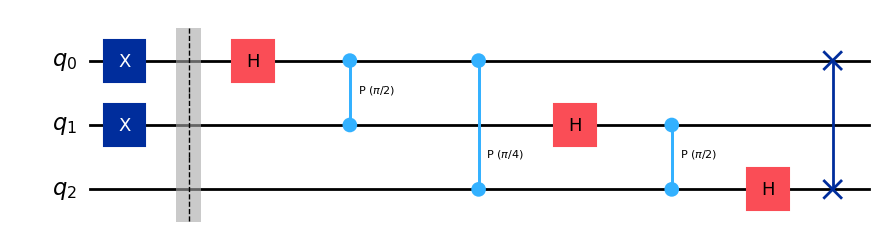

In [ ]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import SwapGate
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

pi = np.pi

def qft(state, n):
    qc = QuantumCircuit(n)
    for i, s  in enumerate(state):
        if s == '1':
            qc.x(i)
    qc.barrier()
    for i in range(n):
        qc.h(i)
        iterations =range((n-1) -i)
        for j in iterations:
            rotation = 2*pi / (2** (j+2))
            control = (j+1) + i
            qc.cp(rotation, control, i)
            j+=1
    for k in range(n//2):
        qc.swap(k, n-1 - k)
    return qc
n = int(input('Number of qubits: '))
print('Number of qubits:', n)
print()
initial_state = input(f'initial state for the {n} qubit sys: ')
print(f'output circuit for the {n} qubit sys:', initial_state)
qc = qft(initial_state, n)
qc.draw('mpl')


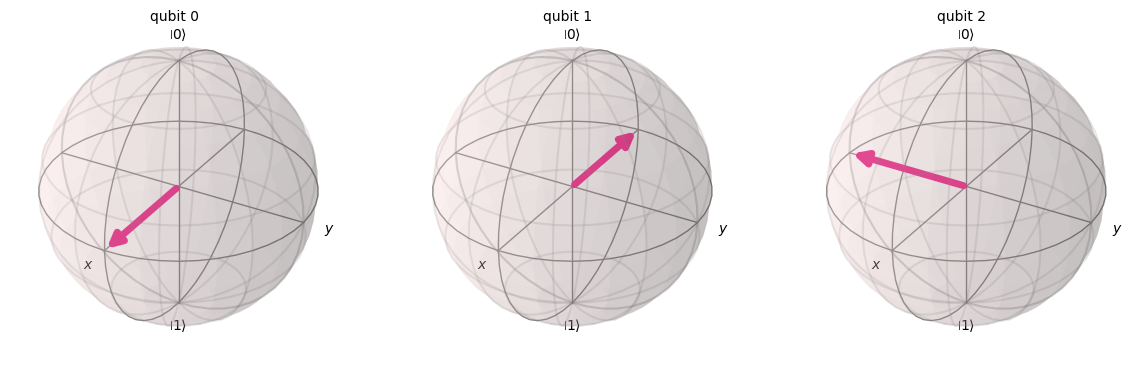

In [ ]:
state = Statevector(qc)
plot_bloch_multivector(state)